# Results

This notebook can be used to visualize the results stored in your Azure status table.

In [151]:
from pathlib import Path

config=Path('..') / '..' / 'output' / 'scripts' / 'confs' / 'aml_search.yaml'

from archai.common.store import ArchaiStore
from archai.common.config import Config

config = Config(str(config))
aml_config = config['aml']
metric_key = config['training'].get('metric_key')
connection_str = aml_config['connection_str']
experiment_name = aml_config['experiment_name']
storage_account_name, storage_account_key = ArchaiStore.parse_connection_string(connection_str)
store = ArchaiStore(storage_account_name, storage_account_key, table_name=experiment_name)


config loaded from:  d:\git\microsoft\archai\archai\tasks\face_segmentation\output\scripts\confs\aml_search.yaml


In [152]:
import pandas as pd
import numpy as np

def calc_frontier(points):
    pareto = []
    pareto += [0]
    p1 = points[0]
    for i in range(1, len(points)):
        p2 = points[i]
        if p2[1] > p1[1]:
            pareto += [i]
            p1 = p2

    return pareto

def scatter_plot(status, xkey, ykey, xlabel, ylabel, color='Blue'):
    points = []
    max_iteration = 0
    for e in status:
        iteration = e['iteration'] if 'iteration' in e else 0
        if iteration > max_iteration:
            max_iteration = iteration
        if xkey in e and ykey in e:
            points += [[float(e[xkey]), float(e[ykey]), iteration]]
    
    if len(points):
        points = np.array(points)
        sorted = points[points[:,0].argsort()]
        pareto = calc_frontier(sorted)
        for i in pareto:
            x,  y, _ = sorted[i]
            sorted[i] = [x, y, max_iteration + 1]

        df = pd.DataFrame(sorted, columns=[xlabel, ylabel, 'pareto'])
        ax1 = df.plot.scatter(x=xlabel, y=ylabel, c='pareto', colormap='tab10_r')
    

In [173]:
status = []
for e in store.get_all_status_entities():
    status += [e]    

print(f"loaded {len(status)} entities")    

loaded 273 entities


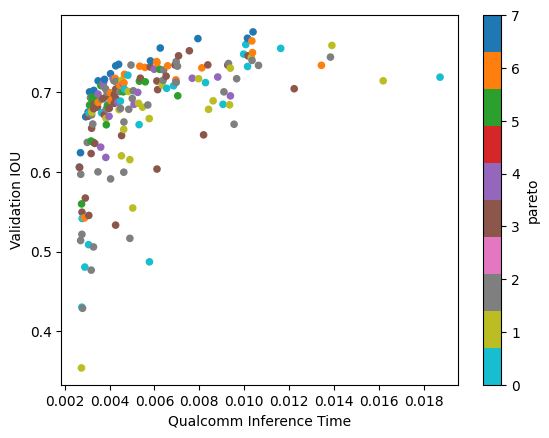

In [174]:
scatter_plot(status, 'mean', 'val_iou', 'Qualcomm Inference Time', 'Validation IOU')

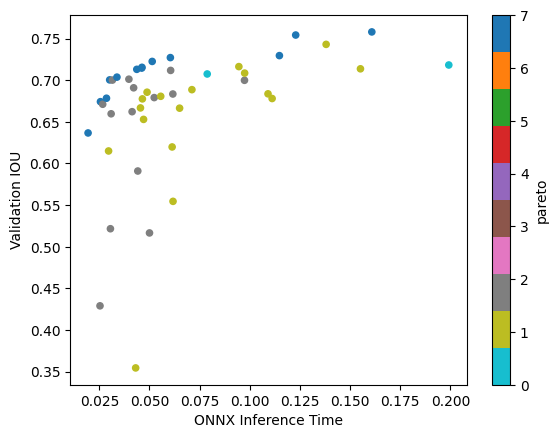

In [175]:
scatter_plot(status, 'onnx_latency', 'val_iou', 'ONNX Inference Time', 'Validation IOU')